<a href="https://colab.research.google.com/github/eduardo20/blazars/blob/master/Clasificador_xg_Blazars_2_poblaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASIFICACION DE BLAZARS
## Con scikit-learn
## Empezamos eliminando caracteristicas menos significativas

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import files
import sys

sys.path.append('/content/drive/My Drive')
#files.upload()
# choose the file on your computer to upload it then
#import Snippet_188

### Cargamos las dependencias de módulos y librerías


In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys

sys.path.append('/content/drive/My Drive/')

In [0]:
#!pip install ipynb
!pwd
!ls "content/drive/My Drive"



/content
ls: cannot access 'content/drive/My Drive': No such file or directory


## Carga de datos
### Cargamos los archivos correspondientes a las dos poblaciones segmentadas que contiene cada uno de ellos el conjunto conpleto de blazars 

In [0]:
#carasteristicas=gui_fname()
features_=['ra', 'dec', 'flux_1_100_gev', 'spectral_index', 'spectral_index_error',
          'detection_significance', 'lii', 'bii', 'pivot_energy', 'flux_density',
          'flux_density_error', 'energy_flux', 'energy_flux_error',
          'curve_significance', 'spectrum_type', 'powerlaw_index',
          'flux_100_300_mev', 'flux_100_300_mev_pos_err',
          'flux_100_300_mev_neg_err', 'nufnu_100_300_mev', 'sqrt_ts_100_300_mev',
          'flux_0p3_1_gev', 'flux_0p3_1_gev_pos_err', 'flux_0p3_1_gev_neg_err',
          'nufnu_0p3_1_gev', 'sqrt_ts_0p3_1_gev', 'flux_1_3_gev',
          'flux_1_3_gev_pos_err', 'flux_1_3_gev_neg_err', 'nufnu_1_3_gev',
          'sqrt_ts_1_3_gev', 'flux_3_10_gev', 'nufnu_3_10_gev',
          'sqrt_ts_3_10_gev', 'flux_10_100_gev', 'nufnu_10_100_gev',
          'sqrt_ts_10_100_gev', 'variability_index', 'significance_peak',
          'flux_peak', 'flux_peak_error', 'time_peak', 'time_peak_interval',
          'source_type', 'analysis_flags', 'HR12', 'HR23', 'HR34', 'hard_slope',
          'soft_slope', 'P_E_lg', 'TS_', 'sig_', 'gamm_log', 'Ts_log', 'sig_log',
          'F100_log']

In [0]:
  def load_clean(pop_,features_):
    p1='/content/drive/My Drive/df_p1_3FG_raw.xlsx'
    p2='/content/drive/My Drive/df_p2_3FG_raw.xlsx'
    p3='/content/drive/My Drive/df_p3_3FG_raw.xlsx'
    df0=pd.read_excel(p2)

    pd.set_option("display.max_columns", 80) # ver el numero de columnas en este caso 73
    #pd.read_csv('Filename.csv').fillna(1e6).astype(np.float32)
    if pop_ == 1 :
      print('Cargando pop1')
      df0=pd.read_excel(p1)
    elif pop_ == 2 :
      print('Cargando pop2')
      df0=pd.read_excel(p2)
    elif pop_ == 3 :
      print('Cargando full')
      df0=pd.read_excel(p3)  
   
    df=df0.copy()
    df.drop(['name'], axis=1, inplace=True)
    df=df.fillna(1e6).astype(np.float32)
    df.head(3)
    #eliminamos columnas que molestan
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    df.drop(['Unnamed: 0.1'], axis=1, inplace=True)
    #y = pd.read_excel(etiquetas).fillna(1e6).astype(np.int32) 
    #df_BCU = pd.read_excel(BCU).fillna(1e6).astype(np.float32)
    #print(X.shape,y.shape)
    #y
    
    print (df.shape)
    df.head(5)
    df_bl=df[features_]
    df['source_type'].apply(pd.Series).stack().value_counts()
    clase='source_type'
    df_bl = df_bl.loc[ (df[clase]== 1)  | (df[clase]== 0)]
    df_UNK = df.loc[ (df[clase]== 2)   ]
    df_bl['source_type'].apply(pd.Series).stack().value_counts()
    df_bl.columns
    y_ = df_bl['source_type']
    y_
    X=df_bl
    X.drop(['source_type'], axis=1, inplace=True)
    from sklearn.model_selection import train_test_split
    sc = StandardScaler()
    sc.fit(X)
    #sc.fit(y)
    X_std = sc.transform(X)
    #df_BCU_std=sc.transform(df_BCU)
    #y_std= sc.transform(y)
    y_.head(5)
    X_std
    return X,y_,df0,X_std

X,y_,df0,X_std=load_clean(3,features_)   

Cargando full
(1717, 57)


In [0]:
X_std

array([[-1.5255393e-01, -2.5805192e+00, -5.5694032e-02, ...,
        -1.4137244e+00, -8.0810249e-01,  4.0193799e-01],
       [-1.5915490e+00, -2.5430784e+00, -5.8723718e-01, ...,
         6.6586608e-01,  1.3796927e-01, -1.0086211e+00],
       [ 1.5752741e+00, -2.5252597e+00,  8.5392272e-01, ...,
         1.5156270e+00,  8.6251390e-01,  1.3337048e+00],
       ...,
       [ 6.2614143e-01,  1.9181380e+00, -3.7154272e-01, ...,
        -1.0319424e+00,  5.4452145e-01, -2.3115249e-01],
       [ 2.8262359e-01,  1.9525707e+00, -3.9490181e-01, ...,
         8.1786060e-01, -1.6906345e+00, -2.9463109e-01],
       [-2.9200140e-01,  2.0329509e+00,  2.5070465e-01, ...,
        -8.2208240e-01, -1.5665478e-03,  8.0250877e-01]], dtype=float32)

# Cargamos los datos en un dataframe


In [0]:
pd.set_option("display.max_columns", 80) # ver el numero de columnas en este caso 73
#pd.read_csv('Filename.csv').fillna(1e6).astype(np.float32)

df0=pd.read_excel(p2)
df=df0.copy()
df.drop(['name'], axis=1, inplace=True)
df=df.fillna(1e6).astype(np.float32)
df.head(3)


NameError: ignored

In [0]:
df0.head(4)

,Unnamed: 0,Unnamed: 0.1,name,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,HR12,HR23,HR34,hard_slope,soft_slope,P_E_lg,TS_,sig_,gamm_log,Ts_log,sig_log,F100_log
0,0,0,3FGL J1026.4-8542,156.6050,-85.7152,9.074170e-10,2.01336,0.08438,13.433965,300.1673,-23.6462,2222.71,1.858600e-13,2.060600e-14,1.011740e-11,1.150420e-12,0.511,1,2.0134,1.008810e-08,3.018620e-09,-2.949990e-09,2.420950e-12,3.427,1.979730e-09,5.195480e-10,-5.032010e-10,1.357070e-12,4.173,5.411360e-10,1.170220e-10,-1.090790e-10,1.298620e-12,6.251,2.340260e-10,1.604210e-12,8.382,8.555690e-11,1.514590e-12,7.324,41.696239,NaN,NaN,NaN,NaN,NaN,1,0,-0.671900,-0.570675,-0.396188,-0.174486,-0.101225,3.346883,3.103793,0.038038,0.303921,0.491893,-1.419783,-9.042193
1,1,1,3FGL J0046.7-8419,11.6875,-84.3200,2.772770e-10,2.82062,0.13341,6.239794,303.0699,-32.8070,395.73,6.895600e-12,1.036500e-12,6.497270e-12,9.888820e-13,0.647,1,2.8206,1.121860e-08,4.038050e-09,-3.890830e-09,2.493400e-12,2.877,1.951180e-09,5.772040e-10,-5.338970e-10,1.220970e-12,3.740,3.592310e-10,1.122630e-10,-1.019240e-10,7.984120e-13,4.067,2.958340e-11,1.851210e-13,1.964,8.163080e-16,1.085870e-17,0.000,62.983513,NaN,NaN,NaN,NaN,NaN,0,0,-0.703688,-0.689033,-0.847828,0.158795,-0.014655,2.597399,10.093845,0.103689,0.450345,1.004057,-0.984266,-9.557086
2,2,2,3FGL J2202.4-8339,330.6101,-83.6560,1.985760e-09,2.42962,0.06724,23.074068,307.9433,-31.7347,757.27,6.903600e-12,4.258600e-13,2.310780e-11,1.767710e-12,5.157,2,2.4700,3.435640e-08,6.642110e-09,-6.582910e-09,8.378720e-12,5.745,9.672910e-09,8.147200e-10,-8.147200e-10,6.411070e-12,13.874,1.843210e-09,1.753410e-10,-1.753410e-10,4.121440e-12,15.423,2.393800e-10,1.439750e-12,8.077,2.484270e-12,2.610000e-14,0.213,377.103882,16.296301,2.664750e-07,2.336680e-08,55212.719977,2630000.0,0,0,-0.560615,-0.679890,-0.770113,0.090223,0.119275,2.879251,16.343190,0.223498,0.385538,1.213337,-0.650727,-8.702073
3,3,3,3FGL J0533.6-8323,83.4106,-83.3847,8.110600e-10,2.29598,0.07827,11.699274,295.7869,-29.1493,946.09,1.196400e-12,1.248500e-13,9.813590e-12,1.027190e-12,0.809,1,2.2960,7.750010e-09,2.872050e-09,-2.839320e-09,1.809270e-12,2.754,3.472950e-09,5.669210e-10,-5.520220e-10,2.303550e-12,6.847,6.923790e-10,1.332310e-10,-1.250930e-10,1.616390e-12,6.802,1.004000e-10,6.659350e-13,4.141,5.346040e-11,8.475950e-13,5.404,144.790558,7.860495,1.053960e-07,1.943020e-08,54695.242951,2630000.0,0,0,-0.381099,-0.667551,-0.746714,0.079162,0.286452,2.975932,12.376029,0.069150,0.360968,1.092581,-1.160210,-9.090947


In [0]:

#eliminamos columnas que molestan
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['Unnamed: 0.1'], axis=1, inplace=True)
#y = pd.read_excel(etiquetas).fillna(1e6).astype(np.int32) 
#df_BCU = pd.read_excel(BCU).fillna(1e6).astype(np.float32)
#print(X.shape,y.shape)
#y
print (df.shape)
df.head(5)

(1590, 57)


,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,HR12,HR23,HR34,hard_slope,soft_slope,P_E_lg,TS_,sig_,gamm_log,Ts_log,sig_log,F100_log
0,156.604996,-85.715202,9.074170e-10,2.01336,0.08438,13.433965,300.167297,-23.646200,2222.709961,1.858600e-13,2.060600e-14,1.011740e-11,1.150420e-12,0.511,1.0,2.0134,1.008810e-08,3.018620e-09,-2.949990e-09,2.420950e-12,3.427,1.979730e-09,5.195480e-10,-5.032010e-10,1.357070e-12,4.173,5.411360e-10,1.170220e-10,-1.090790e-10,1.298620e-12,6.251,2.340260e-10,1.604210e-12,8.382,8.555690e-11,1.514590e-12,7.324,41.696239,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.0,1.0,0.0,-0.671900,-0.570675,-0.396188,-0.174486,-0.101225,3.346883,3.103792,0.038038,0.303921,0.491893,-1.419783,-9.042193
1,11.687500,-84.320000,2.772770e-10,2.82062,0.13341,6.239794,303.069885,-32.806999,395.730011,6.895600e-12,1.036500e-12,6.497270e-12,9.888820e-13,0.647,1.0,2.8206,1.121860e-08,4.038050e-09,-3.890830e-09,2.493400e-12,2.877,1.951180e-09,5.772040e-10,-5.338970e-10,1.220970e-12,3.740,3.592310e-10,1.122630e-10,-1.019240e-10,7.984120e-13,4.067,2.958340e-11,1.851210e-13,1.964,8.163080e-16,1.085870e-17,0.000,62.983513,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.0,0.0,0.0,-0.703688,-0.689033,-0.847828,0.158795,-0.014655,2.597399,10.093845,0.103689,0.450345,1.004057,-0.984266,-9.557086
2,330.610107,-83.655998,1.985760e-09,2.42962,0.06724,23.074068,307.943298,-31.734699,757.270020,6.903600e-12,4.258600e-13,2.310780e-11,1.767710e-12,5.157,2.0,2.4700,3.435640e-08,6.642110e-09,-6.582910e-09,8.378720e-12,5.745,9.672910e-09,8.147200e-10,-8.147200e-10,6.411070e-12,13.874,1.843210e-09,1.753410e-10,-1.753410e-10,4.121440e-12,15.423,2.393800e-10,1.439750e-12,8.077,2.484270e-12,2.610000e-14,0.213,377.103882,16.296301,2.664750e-07,2.336680e-08,55212.718750,2630000.0,0.0,0.0,-0.560615,-0.679890,-0.770113,0.090223,0.119275,2.879251,16.343189,0.223498,0.385538,1.213337,-0.650727,-8.702073
3,83.410599,-83.384697,8.110600e-10,2.29598,0.07827,11.699274,295.786896,-29.149300,946.090027,1.196400e-12,1.248500e-13,9.813590e-12,1.027190e-12,0.809,1.0,2.2960,7.750010e-09,2.872050e-09,-2.839320e-09,1.809270e-12,2.754,3.472950e-09,5.669210e-10,-5.520220e-10,2.303550e-12,6.847,6.923790e-10,1.332310e-10,-1.250930e-10,1.616390e-12,6.802,1.004000e-10,6.659350e-13,4.141,5.346040e-11,8.475950e-13,5.404,144.790558,7.860495,1.053960e-07,1.943020e-08,54695.242188,2630000.0,0.0,0.0,-0.381099,-0.667551,-0.746714,0.079162,0.286452,2.975932,12.376029,0.069150,0.360968,1.092581,-1.160210,-9.090947
4,4.745400,-81.876900,6.529680e-10,2.07544,0.10204,10.650256,304.329803,-35.163101,2187.520020,1.392900e-13,1.858100e-14,7.255220e-12,9.692230e-13,0.310,1.0,2.0754,9.456800e-09,3.084540e-09,-2.976170e-09,2.255640e-12,3.206,1.945380e-09,5.028870e-10,-4.849710e-10,1.323820e-12,4.257,4.000200e-10,1.082130e-10,-1.006460e-10,9.541290e-13,4.752,1.268910e-10,8.634840e-13,5.924,7.248200e-11,1.251450e-12,6.454,85.652306,7.363566,4.243460e-08,1.054210e-08,55030.082031,2630000.0,1.0,0.0,-0.658771,-0.658890,-0.518359,-0.140531,0.000119,3.339952,8.042276,0.029107,0.317110,0.905379,-1.535998,-9.185108


# Caracteristicas

1.  Listamos las features
2.  Creamos un array que las contiene desde el cual iremos restando en principio las que aportan 0% al modelo



In [0]:
df.columns

Index(['ra', 'dec', 'flux_1_100_gev', 'spectral_index', 'spectral_index_error',
       'detection_significance', 'lii', 'bii', 'pivot_energy', 'flux_density',
       'flux_density_error', 'energy_flux', 'energy_flux_error',
       'curve_significance', 'spectrum_type', 'powerlaw_index',
       'flux_100_300_mev', 'flux_100_300_mev_pos_err',
       'flux_100_300_mev_neg_err', 'nufnu_100_300_mev', 'sqrt_ts_100_300_mev',
       'flux_0p3_1_gev', 'flux_0p3_1_gev_pos_err', 'flux_0p3_1_gev_neg_err',
       'nufnu_0p3_1_gev', 'sqrt_ts_0p3_1_gev', 'flux_1_3_gev',
       'flux_1_3_gev_pos_err', 'flux_1_3_gev_neg_err', 'nufnu_1_3_gev',
       'sqrt_ts_1_3_gev', 'flux_3_10_gev', 'nufnu_3_10_gev',
       'sqrt_ts_3_10_gev', 'flux_10_100_gev', 'nufnu_10_100_gev',
       'sqrt_ts_10_100_gev', 'variability_index', 'significance_peak',
       'flux_peak', 'flux_peak_error', 'time_peak', 'time_peak_interval',
       'source_type', 'analysis_flags', 'HR12', 'HR23', 'HR34', 'hard_slope',
       'soft_slo

In [0]:
features_=['ra', 'dec', 'flux_1_100_gev', 'spectral_index', 'spectral_index_error',
       'detection_significance', 'lii', 'bii', 'pivot_energy', 'flux_density',
       'flux_density_error', 'energy_flux', 'energy_flux_error',
       'curve_significance', 'spectrum_type', 'powerlaw_index',
       'flux_100_300_mev', 'flux_100_300_mev_pos_err',
       'flux_100_300_mev_neg_err', 'nufnu_100_300_mev', 'sqrt_ts_100_300_mev',
       'flux_0p3_1_gev', 'flux_0p3_1_gev_pos_err', 'flux_0p3_1_gev_neg_err',
       'nufnu_0p3_1_gev', 'sqrt_ts_0p3_1_gev', 'flux_1_3_gev',
       'flux_1_3_gev_pos_err', 'flux_1_3_gev_neg_err', 'nufnu_1_3_gev',
       'sqrt_ts_1_3_gev', 'flux_3_10_gev', 'nufnu_3_10_gev',
       'sqrt_ts_3_10_gev', 'flux_10_100_gev', 'nufnu_10_100_gev',
       'sqrt_ts_10_100_gev', 'variability_index', 'significance_peak',
       'flux_peak', 'flux_peak_error', 'time_peak', 'time_peak_interval',
       'source_type', 'analysis_flags', 'HR12', 'HR23', 'HR34', 'hard_slope',
       'soft_slope', 'P_E_lg', 'TS_', 'sig_', 'gamm_log', 'Ts_log', 'sig_log',
       'F100_log']

# Creamos un dataframe con las nuevas características reducidas :

1.   df dataframe con todas las caracteristicas
2.   df_bl dataframe con caracteristicas reducidas



In [0]:
#sns.pairplot(X)
#y.reset_index(drop=True , inplace = True)
#y.drop(['Unnamed: 0'], axis=1)
#y.drop(['Unnamed: 0'], axis=1, inplace=True)
#y_ = y['source_type']
#type(y_)
#y_
df_bl=df[features_]
df['source_type'].apply(pd.Series).stack().value_counts()

1.0    626
2.0    563
0.0    401
dtype: int64

In [0]:
df_bl.head(3)

,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,HR12,HR23,HR34,hard_slope,soft_slope,P_E_lg,TS_,sig_,gamm_log,Ts_log,sig_log,F100_log
0,156.604996,-85.715202,9.074170e-10,2.01336,0.08438,13.433965,300.167297,-23.646200,2222.709961,1.858600e-13,2.060600e-14,1.011740e-11,1.150420e-12,0.511,1.0,2.0134,1.008810e-08,3.018620e-09,-2.949990e-09,2.420950e-12,3.427,1.979730e-09,5.195480e-10,-5.032010e-10,1.357070e-12,4.173,5.411360e-10,1.170220e-10,-1.090790e-10,1.298620e-12,6.251,2.340260e-10,1.604210e-12,8.382,8.555690e-11,1.514590e-12,7.324,41.696239,1000000.000000,1.000000e+06,1.000000e+06,1000000.00000,1000000.0,1.0,0.0,-0.671900,-0.570675,-0.396188,-0.174486,-0.101225,3.346883,3.103792,0.038038,0.303921,0.491893,-1.419783,-9.042193
1,11.687500,-84.320000,2.772770e-10,2.82062,0.13341,6.239794,303.069885,-32.806999,395.730011,6.895600e-12,1.036500e-12,6.497270e-12,9.888820e-13,0.647,1.0,2.8206,1.121860e-08,4.038050e-09,-3.890830e-09,2.493400e-12,2.877,1.951180e-09,5.772040e-10,-5.338970e-10,1.220970e-12,3.740,3.592310e-10,1.122630e-10,-1.019240e-10,7.984120e-13,4.067,2.958340e-11,1.851210e-13,1.964,8.163080e-16,1.085870e-17,0.000,62.983513,1000000.000000,1.000000e+06,1.000000e+06,1000000.00000,1000000.0,0.0,0.0,-0.703688,-0.689033,-0.847828,0.158795,-0.014655,2.597399,10.093845,0.103689,0.450345,1.004057,-0.984266,-9.557086
2,330.610107,-83.655998,1.985760e-09,2.42962,0.06724,23.074068,307.943298,-31.734699,757.270020,6.903600e-12,4.258600e-13,2.310780e-11,1.767710e-12,5.157,2.0,2.4700,3.435640e-08,6.642110e-09,-6.582910e-09,8.378720e-12,5.745,9.672910e-09,8.147200e-10,-8.147200e-10,6.411070e-12,13.874,1.843210e-09,1.753410e-10,-1.753410e-10,4.121440e-12,15.423,2.393800e-10,1.439750e-12,8.077,2.484270e-12,2.610000e-14,0.213,377.103882,16.296301,2.664750e-07,2.336680e-08,55212.71875,2630000.0,0.0,0.0,-0.560615,-0.679890,-0.770113,0.090223,0.119275,2.879251,16.343189,0.223498,0.385538,1.213337,-0.650727,-8.702073


In [0]:
clase='source_type'
df_bl = df_bl.loc[ (df[clase]== 1)  | (df[clase]== 0)]
df_UNK = df.loc[ (df[clase]== 2)   ]
df_UNK['source_type'].apply(pd.Series).stack().value_counts()
#y_.shape
#y.info()

2.0    563
dtype: int64

# OJO df_UNK todavia no se han reducido las características. Cuando se aplique la predicción habra que modificarlo como se hizo con el dataframe df

In [0]:
df_UNK.head(5)

,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,HR12,HR23,HR34,hard_slope,soft_slope,P_E_lg,TS_,sig_,gamm_log,Ts_log,sig_log,F100_log
1027,85.560303,-87.618500,4.170300e-10,2.03895,0.14339,6.431914,300.360992,-27.813000,2499.959961,6.744600e-14,1.332100e-14,4.636140e-12,9.172090e-13,0.308,1.0,2.0389,5.856320e-09,2.706810e-09,-2.661290e-09,1.401870e-12,2.210,3.402460e-10,4.098260e-10,1.000000e+06,2.325300e-13,0.782,2.440210e-10,1.023570e-10,-9.301360e-11,5.841320e-13,2.924,1.601190e-10,1.094290e-12,5.529,2.434160e-11,4.264750e-13,3.656,50.015041,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,2.0,256.0,-0.890182,-0.164694,-0.207606,0.042913,-0.725489,3.397933,7.776074,0.047886,0.309407,0.890760,-1.319790,-9.379832
1028,317.163086,-86.317596,1.974810e-10,1.74000,0.26993,4.728537,306.415100,-29.160400,8678.959961,3.518900e-15,1.118300e-15,2.571730e-12,8.174750e-13,0.417,1.0,1.7400,1.034170e-09,2.552510e-09,1.000000e+06,2.550060e-13,0.438,4.628000e-10,4.352200e-10,-4.140330e-10,3.277170e-13,1.067,6.058490e-11,8.389500e-11,1.000000e+06,1.493900e-13,0.841,2.303760e-12,1.631330e-14,0.138,5.805490e-11,1.151920e-12,5.852,35.195969,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,2.0,4.0,-0.381684,-0.768488,-0.926735,0.158247,0.386804,3.938468,7.443311,0.088188,0.240549,0.871766,-1.054591,-9.704474
1029,186.165298,-83.209297,4.487580e-10,2.69452,0.10959,7.470914,302.089386,-20.381399,488.019989,5.254500e-12,6.981400e-13,8.609830e-12,1.159620e-12,1.103,1.0,2.6945,1.585340e-08,4.358800e-09,-4.375290e-09,3.564340e-12,3.692,3.458890e-09,6.843420e-10,-6.694150e-10,2.194040e-12,5.447,3.306700e-10,1.205140e-10,-1.117190e-10,7.434510e-13,3.296,7.640900e-11,4.846760e-13,3.325,3.678400e-12,5.084610e-14,0.469,56.541351,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,2.0,0.0,-0.641794,-0.825484,-0.624599,-0.200885,0.183690,2.688438,7.568197,0.147639,0.430481,0.878992,-0.830798,-9.347988
1030,344.541290,-82.805603,7.053620e-10,2.19382,0.11050,8.783147,307.012695,-33.402302,1878.079956,2.121000e-13,3.074500e-14,8.055360e-12,1.185090e-12,1.339,1.0,2.1938,2.145630e-09,5.739860e-09,1.000000e+06,5.058890e-13,0.329,1.988640e-09,6.748210e-10,-6.505440e-10,1.334690e-12,3.162,5.644010e-10,1.349750e-10,-1.231120e-10,1.330720e-12,5.472,1.857650e-10,1.246770e-12,6.455,2.528040e-11,4.166490e-13,3.273,54.801598,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,2.0,0.0,-0.037973,-0.557860,-0.504736,-0.053124,0.519887,3.273714,6.239404,0.152451,0.341201,0.795143,-0.816870,-9.151587
1031,226.141693,-82.709503,3.001340e-10,2.29785,0.16781,4.106724,307.208893,-20.970200,1438.089966,1.694100e-13,4.180000e-14,3.636390e-12,9.182700e-13,0.459,1.0,2.2979,1.112970e-08,3.201060e-09,-3.148340e-09,2.597810e-12,3.585,1.214770e-09,5.359770e-10,-5.216660e-10,8.055620e-13,2.391,2.399310e-10,1.127720e-10,-1.033030e-10,5.600270e-13,2.511,5.106580e-11,3.386380e-13,2.471,1.038210e-11,1.644900e-13,1.937,45.303288,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,2.0,8.0,-0.803188,-0.670130,-0.649028,-0.021102,-0.133058,3.157786,11.031491,0.111768,0.361322,1.042634,-0.951683,-9.522685


In [0]:
#X.where(np.isnan(X))
#X.drop('Unnamed: 0', axis=1, inplace=True) # borro la columna sin reasignar un nuevo dataframe



In [0]:
#df_BCU.drop('Unnamed: 0', axis=1, inplace=True) # borro la columna sin reasignar un nuevo dataframe
#df_BCU.drop('source_type', axis=1, inplace=True)
df_bl.columns
y_ = df_bl['source_type']
y_
#df_bl.head(2)

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1022    0.0
1023    0.0
1024    1.0
1025    0.0
1026    1.0
Name: source_type, Length: 1027, dtype: float32

In [0]:
X=df_bl
X.drop(['source_type'], axis=1, inplace=True)


In [0]:
caracteristicas_=df_bl.columns
#X.head(3)
caracteristicas_
#type(caracteristicas_)

Index(['ra', 'dec', 'flux_1_100_gev', 'spectral_index', 'spectral_index_error',
       'detection_significance', 'lii', 'bii', 'pivot_energy', 'flux_density',
       'flux_density_error', 'energy_flux', 'energy_flux_error',
       'curve_significance', 'spectrum_type', 'powerlaw_index',
       'flux_100_300_mev', 'flux_100_300_mev_pos_err',
       'flux_100_300_mev_neg_err', 'nufnu_100_300_mev', 'sqrt_ts_100_300_mev',
       'flux_0p3_1_gev', 'flux_0p3_1_gev_pos_err', 'flux_0p3_1_gev_neg_err',
       'nufnu_0p3_1_gev', 'sqrt_ts_0p3_1_gev', 'flux_1_3_gev',
       'flux_1_3_gev_pos_err', 'flux_1_3_gev_neg_err', 'nufnu_1_3_gev',
       'sqrt_ts_1_3_gev', 'flux_3_10_gev', 'nufnu_3_10_gev',
       'sqrt_ts_3_10_gev', 'flux_10_100_gev', 'nufnu_10_100_gev',
       'sqrt_ts_10_100_gev', 'variability_index', 'significance_peak',
       'flux_peak', 'flux_peak_error', 'time_peak', 'time_peak_interval',
       'analysis_flags', 'HR12', 'HR23', 'HR34', 'hard_slope', 'soft_slope',
       'P_E_lg', 

(array([401., 626.]),
 array([0. , 0.5, 1. ], dtype=float32),
 <a list of 2 Patch objects>)

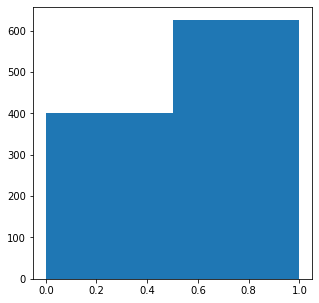

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5)
plt.hist(y_, bins=2)

In [0]:
1- 401/(401+626)

#y_

0.6095423563777994

### Normalización de los datos

In [0]:
from sklearn.model_selection import train_test_split
sc = StandardScaler()
sc.fit(X)
#sc.fit(y)
X_std = sc.transform(X)
#df_BCU_std=sc.transform(df_BCU)
#y_std= sc.transform(y)
y_.head(5)

0    1.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: source_type, dtype: float32

### División de datos en dos conjuntos: X_train, y_train, conjunto de entrenamiento. X_test, y_test conjunto de test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.4)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# APLICACIÓN DE CLASIFICADORES

## Estudiamos los datos con un mapa de calor

In [0]:
#plt.figure(figsize=(35,30))
#cor = X.corr()
#g=sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

In [0]:
#savefig("/content/drive/My Drive/poblacion_2.png")
#Correlation with output variable
#cor_target = abs(cor["spectral_index"])
#Selecting highly correlated features
#relevant_features = cor_target[cor_target>0.85]
#relevant_features

#Eliminación recursiva de características

In [0]:
#from sklearn.feature_selection import RFECV
#from sklearn.svm import SVR
#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
#estimator = SVR(kernel="linear")
#selector = RFECV(estimator, step=1, cv=5)
#selector = selector.fit(X_std, y_)
#selector.support_


# Número optimo de caracteristicas para el clasificador

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y_, test_size=0.25)

## Con xgboost

In [0]:
#!pip install xgboost

In [0]:
from xgboost.plotting import plot_importance
import xgboost as xgb

In [0]:
import xgboost as xgb
xg = xgb.XGBClassifier(objective ='binary:logistic',
             colsample_bytree = 0.3,
             learning_rate = 0.21,
             max_depth = 6, 
             alpha = 10,
             n_estimators = 1000,
             feature_names=caracteristicas_ )
#,
#            feature_names=caracteristicas_

In [0]:
%%timeit 
xg.fit(X_train,y_train)

1 loop, best of 3: 798 ms per loop


In [0]:
xg.score(X_test, y_test)

0.8949416342412452

In [0]:
confusion_matrix(y_test, xg.predict(X_test))

array([[ 94,  14],
       [ 13, 136]])

<Figure size 720x720 with 0 Axes>

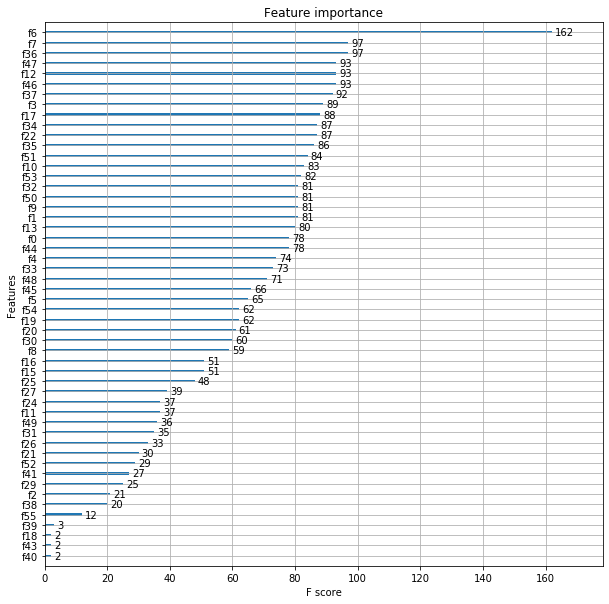

In [0]:
importances = xg.feature_importances_
#importances
plt.rcParams['figure.figsize'] = (10,10)
plt.figure()
plot_importance(xg)

In [0]:
Snippet_190(xg, X_std, y_, 100)
xg.score

NameError: ignored

###Identificamos cada una de las features (feature importance) con su columna en el dataframe

## Snipetts para calcular y mostrar las curvas de aprendizaje

In [0]:
#!pip install ipynb

from ipynb.fs.full.my_functions import Snippet_188_a, Snippet_191,Snippet_192
#Snippet_192(xg, X_std, y_)
#Snippet_191(xg, X_std, y_)
#Snippet_188_a(X_std, y_,xg)

In [0]:
#Snippet_188_a(X_std, y_,xg)

In [0]:
from ipynb.fs.full.my_functions import Snippet_189
#Snippet_189(X_std, y_,xg)

In [0]:
%load /content/drive/My Drive/my_functions.ipynb
#from ipynb.fs.full.my_functions import Snippet_188_a
#Snippet_191(gbc, X_std, y_)
#%lsmagic



In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, xg.predict(X_test))

array([[ 94,  14],
       [ 13, 136]])

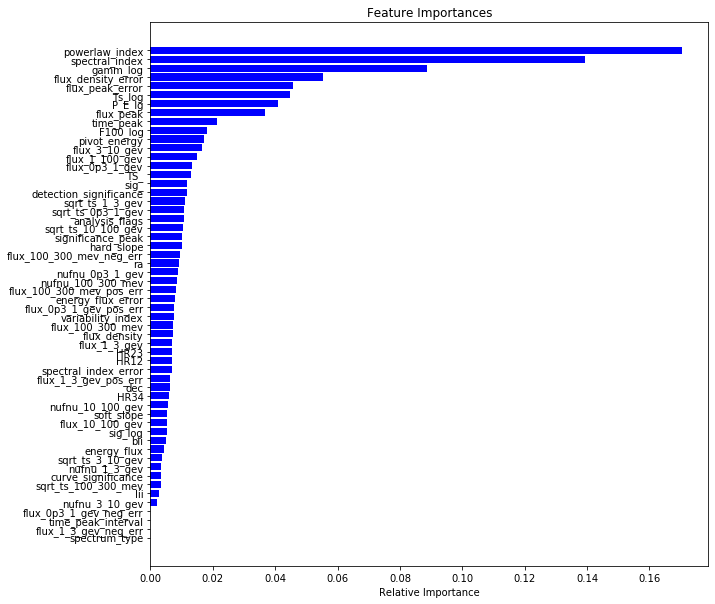

In [0]:
features = X.columns
importances = xg.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
#X_test=X_test.values
#xg.feature_importances_
#def guarda_importancias (clf, archivo, salvar) :
#  #cargamos el archivo donde guadaremos las importancias
#  try:
#     n_df=pd.read_excel(archivo)
#  except IOError:
#   print ('El archivo no existe lo creamos')
#  #n_df=pd.read_excel(archivo)
#  row_=clf.feature_importances_
#  np.prod(row_.shape)
#  n_df=pd.DataFrame(columns=df_bl.columns)
#  n_df.loc[-1] = row_  # adding a row
#  n_df.index = n_df.index + 1  # shifting index
#  n_df = n_df.sort_index()  # sorting by index
#  archivo ='/content/drive/My Drive/' + archivo
#  if salvar =='s':
#    print(n_df.shape)
#    print(archivo)
#    print (type(n_df))
#    n_df.to_excel(archivo) 
  

In [0]:
from ipynb.fs.full.my_functions import guarda_importancias
import pandas as pd
#'/content/drive/My Drive/' +arc
#df_p2.to_excel('/content/drive/My Drive/df_p2_3FG_raw.xlsx') 
guarda_importancias (xg,df_bl,"xg.xlsx", "n")
!ls '/content/drive/My Drive/'

El archivo no existe lo creamos
'1 INTRODUCCIÓN.gdoc'			     etiquetas3FG_raw.xlsx
 AUC_1.png				     FERMI3FGL4Y_old.xls
 backup					     FERMI3FGL4Y_short_old.xls
 BCU_raw.xlsx				     FERMI3FGL4Y_short.xls
' Blazars_2_poblaciones.ipynb'		     Imagen1.png
 BLZARS_FULL_POPULATION_raw.xlsx	     Imagen2.png
 Caracteristicas3FG_raw.xlsx		     Imagen3.png
'Colab Notebooks'			     Mitty
'Copia_de_Blazars_2_poblaciones (1).ipynb'   my_functions.ipynb
 df_p1_3FG_raw.xlsx			     pickle_model.pkl
 df_p2_3FG_raw.xlsx			     poblacion_2.png
 Discriminantes_pappers.png		     tanteo-1.png
'Documento de eduardorodriguez rioja'	    'TFM-lay out.gdoc'
'Documento de eduardorodriguez rioja (1)'    Untitled0.ipynb


In [0]:
#Snippet_190(forest, X_std, y_, 100)
#cont=0
#for feat, importance in zip(X.columns, gbc.feature_importances_):
#    cont=1+cont
#    if importance >= 0:
#        print(f' f({cont}) -> {feat} : {importance}')

#Plots rendimiento comparado clasificadores

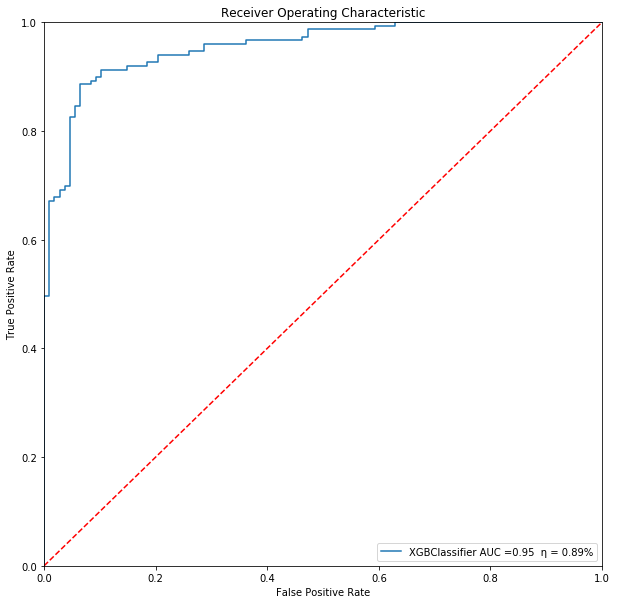

In [0]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
#clasificadores =[xg,forest, kn, tree, kn2, gbc, svm]
clasificadores =[xg]
#clasificadores =[xg, forest, kn, tree, kn2, gbc]
plt.title('Receiver Operating Characteristic')
for clf in clasificadores:
    # calculate the fpr and tpr for all thresholds of the classification
    
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    roc_auc='%.2f' % roc_auc
    name =clf.__class__.__name__
    score_=clf.score(X_test, y_test)
    score_1='%.2f' % score_
    #print (score_1)
    # method I: plt
 

    
    plt.plot(fpr, tpr ,label = f'{name} AUC ={roc_auc}  η = {score_1}%')
    plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')    
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("/content/drive/My Drive/xg-AUC_1.png")
plt.show()

# method II: ggplot
#from ggplot import *
#df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
#ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

# Salvar y cargar modelo

In [0]:
import pickle

#from google.colab import files
#files.download('your typical text file or what ever.txt')
# Create your model here (same as above)
#

# Save to file in the current working directory
#model=xg
pkl_filename = "/content/drive/My Drive/pickle_model.pkl"
#with open(pkl_filename, 'wb') as file:
#    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
#Calculate the accuracy score and predict target values
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X_test)
Snippet_192(pickle_model, X_test, y_test)

Test score: 97.28 %
Accuracy: 0.86 (+/- 0.09)
